In [76]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv("/content/drive/MyDrive/Ecommerce/train_data.csv")

In [78]:
test_data = pd.read_csv("/content/drive/MyDrive/Ecommerce/test_data.csv")
test_hidden_data = pd.read_csv("/content/drive/MyDrive/Ecommerce/test_data_hidden.csv")

In [79]:
data

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive
...,...,...,...,...,...,...,...,...
3995,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2017-12-08T00:00:00.000Z,"It‚Äôs fun for the family to play with, but it...",Fun toy,Positive
3996,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-03-31T00:00:00.000Z,"I love the Kindle, it is a great product. It r...",Great Product,Positive
3997,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-19T00:00:00.000Z,I was looking for a blutooth speaker to use wi...,"Great ""dumb"" speaker",Positive
3998,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,This is the second Amazon Fire 7 tablet I have...,A great 7 inch tablet at a great price,Positive


In [80]:
a = data["sentiment"].value_counts()

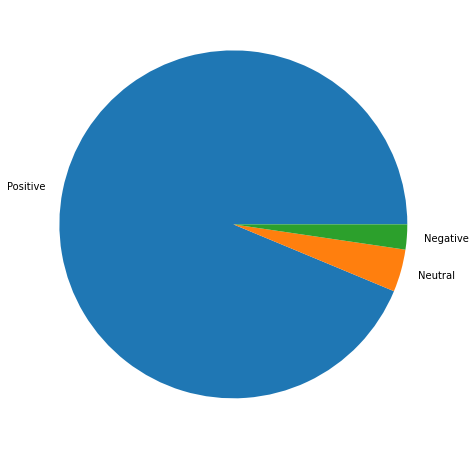

In [81]:
labels = [a.index[i] for i in range(len(a))]
values = a.values
plt.figure(figsize=(8,8))
plt.pie(values,labels=labels)
plt.show()

In [82]:
import gensim

In [83]:
from gensim.utils import simple_preprocess as sp 

In [84]:
text = data["reviews.text"]

In [85]:
text

0       Purchased on Black FridayPros - Great Price (e...
1       I purchased two Amazon in Echo Plus and two do...
2       Just an average Alexa option. Does show a few ...
3       very good product. Exactly what I wanted, and ...
4       This is the 3rd one I've purchased. I've bough...
                              ...                        
3995    It‚Äôs fun for the family to play with, but it...
3996    I love the Kindle, it is a great product. It r...
3997    I was looking for a blutooth speaker to use wi...
3998    This is the second Amazon Fire 7 tablet I have...
3999    very satisfied with tablet, very fast and effi...
Name: reviews.text, Length: 4000, dtype: object

In [86]:
processed_text = [sp(a) for a in text]

In [87]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [89]:
def remove_stopwords(words):
  ans = [ i for i in words if i not in stop_words] 
  ans = " ".join(ans)
  return ans

In [90]:
processed_text = [ remove_stopwords(i) for i in processed_text ]

In [91]:
len(processed_text)

4000

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
tf_idf  = TfidfVectorizer()
x = tf_idf.fit_transform(processed_text)

In [94]:
x.shape

(4000, 4639)

In [95]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [96]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['sentiment']= label_encoder.fit_transform(data['sentiment'])  

In [97]:
data["sentiment"].unique()

array([2, 1, 0])

In [98]:
y = data.iloc[:,-1]

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [101]:
print(x_train.shape)
print(y_train.shape)

(3200, 4639)
(3200,)


In [102]:
clf.fit(x_train,y_train)

MultinomialNB()

In [103]:
y_pred = clf.predict(x_test)

In [104]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,roc_auc_score,recall_score,roc_curve

In [105]:
cf = confusion_matrix(y_test,y_pred)

In [106]:
print(cf)

[[  0   0  13]
 [  0   0  36]
 [  0   0 751]]


In [107]:
print("Accuracy Score is:",accuracy_score(y_test,y_pred)*100)

Accuracy Score is: 93.875


In [108]:
print("Recall Score is:",recall_score(y_test,y_pred,average = None)*100)

Recall Score is: [  0.   0. 100.]


In [109]:
print("F1 Score is:",f1_score(y_test,y_pred, average = None)*100)

F1 Score is: [ 0.         0.        96.8407479]


In [110]:
print("Precision Score is:",precision_score(y_test,y_pred,average = None)*100)

Precision Score is: [ 0.     0.    93.875]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
y_pred_prob = clf.predict_proba(x_test)
print("ROC-AUC Score is:",roc_auc_score( y_test,y_pred_prob, multi_class="ovr", average='weighted'))

ROC-AUC Score is: 0.7142770349664445


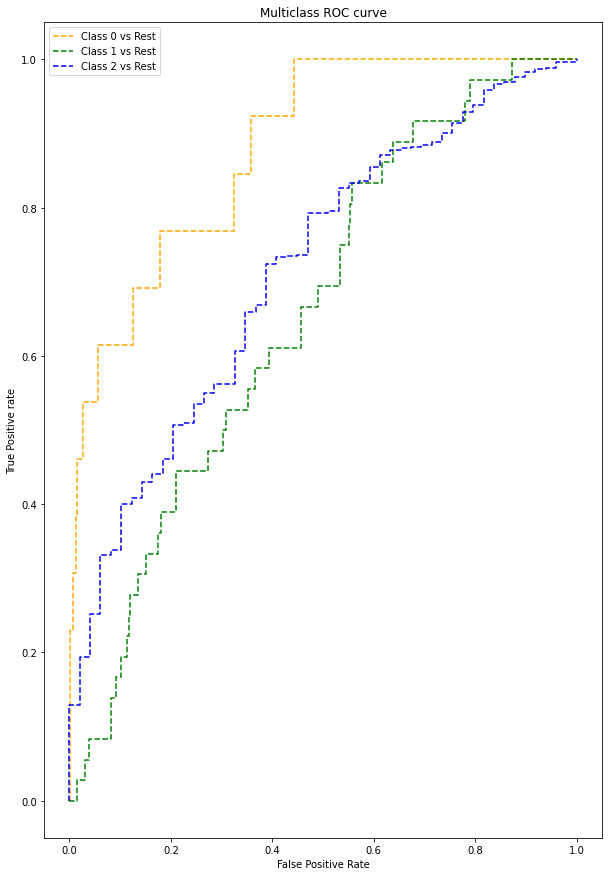

In [112]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize=(10,15))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

TREE BASED CLASSIFIER


In [113]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()

In [114]:
from sklearn.model_selection import GridSearchCV
param_grid  = {'learning_rate':[0.01,0.1,1],}
grid = GridSearchCV(classifier, param_grid,scoring='accuracy', return_train_score=False)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.1}


In [115]:
classifier = GradientBoostingClassifier(learning_rate= 0.1)
classifier.fit(x_train, y_train)

GradientBoostingClassifier()

In [116]:
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


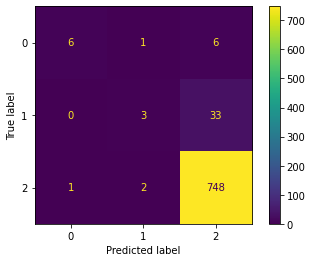

In [117]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.50      0.08      0.14        36
           2       0.95      1.00      0.97       751

    accuracy                           0.95       800
   macro avg       0.77      0.51      0.57       800
weighted avg       0.93      0.95      0.93       800



In [119]:
y_pred_prob = classifier.predict_proba(x_test)
print("ROC-AUC Score is:",roc_auc_score( y_test,y_pred_prob, multi_class="ovr", average='weighted'))

ROC-AUC Score is: 0.7917798173092158


XGBOOST


In [120]:
from xgboost import XGBClassifier
Classifier = XGBClassifier(n_estimators = 1000, max_depth =10, learning_rate = 0.1)

In [121]:
Classifier.fit(x_train, y_train)

XGBClassifier(max_depth=10, n_estimators=1000, objective='multi:softprob')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


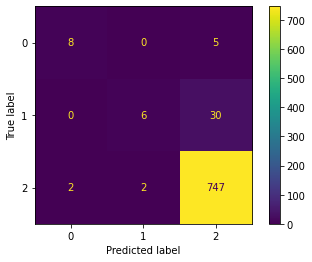

In [122]:
y_pred = Classifier.predict(x_test)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Classifier, x_test, y_test)

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.75      0.17      0.27        36
           2       0.96      0.99      0.97       751

    accuracy                           0.95       800
   macro avg       0.84      0.59      0.65       800
weighted avg       0.94      0.95      0.94       800



In [124]:
y_pred_prob = Classifier.predict_proba(x_test)
print("ROC-AUC Score is:",roc_auc_score( y_test,y_pred_prob, multi_class="ovr", average='weighted'))

ROC-AUC Score is: 0.7992777337872222


**MUTLICLASS SVM**



In [125]:
import tensorflow as tf

In [126]:
import keras

In [127]:
from sklearn.decomposition import TruncatedSVD

In [128]:
tsvd = TruncatedSVD(n_components=1000)
x_sparse_tsvd = tsvd.fit(x).transform(x)

In [129]:
x_sparse_tsvd.shape

(4000, 1000)

In [130]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [131]:
x_train,x_test,y_train, y_test = train_test_split(x_sparse_tsvd,y,test_size = 0.2,random_state=42)

In [132]:
x_train.shape

(3200, 1000)

In [133]:
x_test.shape

(800, 1000)

In [134]:
from keras.models import Sequential
from keras.layers import Dense,Input
from tensorflow.keras.optimizers import SGD

In [135]:
model = Sequential()
model.add(Input(shape=(1000)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
loss_fn = keras.losses.CategoricalCrossentropy(from_logits=False)
model.compile(optimizer='adam', loss= loss_fn, metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               512512    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 3)                 771       
                                                                 
Total params: 644,611
Trainable params: 644,611
Non-trainable params: 0
_________________________________________________________________


In [136]:
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size = 500, epochs=100,verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 0.9286 - accuracy: 0.8288 - val_loss: 0.6550 - val_accuracy: 0.9388
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.4890 - accuracy: 0.9369 - val_loss: 0.3098 - val_accuracy: 0.9388
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2575 - accuracy: 0.9369 - val_loss: 0.2511 - val_accuracy: 0.9388
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2212 - accuracy: 0.9369 - val_loss: 0.2480 - val_accuracy: 0.9388
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1867 - accuracy: 0.9369 - val_loss: 0.2252 - val_accuracy: 0.9388
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1527 - accuracy: 0.9369 - val_loss: 0.2099 - val_accuracy: 0.9388
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1356 - accuracy: 0.9369 - val_loss: 0.2046 - val_accuracy: 0.9388
Epoch 8/100
7/7 [=========

In [137]:
train_error, train_acc = model.evaluate(x_train, y_train, verbose=1)
test_error, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))

25/25 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.9563
Train: 100.000, Test: 95.625


In [138]:
from textblob import TextBlob

In [139]:
text[0]

'Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money'

In [140]:
sent = TextBlob(text[0])

In [141]:
sent.sentiment

Sentiment(polarity=0.36354166666666665, subjectivity=0.6791666666666667)

In [142]:
data['sent_score'] = data['reviews.text'].apply(lambda x: (TextBlob(x).sentiment.polarity))
data.head()


,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,sent_score
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,2,0.363542
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,2,0.458214
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,1,-0.140476
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,2,0.690000
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,2,0.187500


In [143]:
from keras.layers.recurrent import RECURRENT_DROPOUT_WARNING_MSG
from keras.models import Sequential
from keras.layers import LSTM, Dense,Embedding

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim= 1000,output_dim =  64))
lstm_model.add(LSTM(500, return_sequences = True))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(3,activation = "softmax"))
loss_fn = keras.losses.CategoricalCrossentropy(from_logits=False)
lstm_model.compile(optimizer='adam', loss= loss_fn, metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          64000     
                                                                 
 lstm_8 (LSTM)               (None, None, 500)         1130000   
                                                                 
 lstm_9 (LSTM)               (None, 100)               240400    
                                                                 
 dense_7 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1,434,703
Trainable params: 1,434,703
Non-trainable params: 0
_________________________________________________________________


In [144]:
x_train.shape

(3200, 1000)

In [145]:
lstm_hist = lstm_model.fit(x_train, y_train, epochs = 50, batch_size = 500, verbose = 1, shuffle = False)

Epoch 1/50
7/7 [==============================] - 12s 1s/step - loss: 0.6354 - accuracy: 0.7959
Epoch 2/50
7/7 [==============================] - 9s 1s/step - loss: 0.2933 - accuracy: 0.9369
Epoch 3/50
7/7 [==============================] - 9s 1s/step - loss: 0.2824 - accuracy: 0.9369
Epoch 4/50
7/7 [==============================] - 9s 1s/step - loss: 0.2796 - accuracy: 0.9369
Epoch 5/50
7/7 [==============================] - 9s 1s/step - loss: 0.2794 - accuracy: 0.9369
Epoch 6/50
7/7 [==============================] - 9s 1s/step - loss: 0.2784 - accuracy: 0.9369
Epoch 7/50
7/7 [==============================] - 10s 1s/step - loss: 0.2781 - accuracy: 0.9369
Epoch 8/50
7/7 [==============================] - 10s 1s/step - loss: 0.2784 - accuracy: 0.9369
Epoch 9/50
7/7 [==============================] - 10s 1s/step - loss: 0.2783 - accuracy: 0.9369
Epoch 10/50
7/7 [==============================] - 10s 1s/step - loss: 0.2781 - accuracy: 0.9369
Epoch 11/50
7/7 [===========================

In [146]:
train_error, train_acc = lstm_model.evaluate(x_train, y_train, verbose=1)
test_error, test_acc = lstm_model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))

25/25 [==============================] - 2s 68ms/step - loss: 0.2677 - accuracy: 0.9388
Train: 93.687, Test: 93.875


In [147]:
processed_docs = [ i.split() for i in processed_text  ]

In [148]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [149]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [150]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

document_num = 20
bow_doc_x = bow_corpus[document_num]


In [151]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [152]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.028*"device" + 0.027*"home" + 0.024*"smart" + 0.019*"plus" + 0.015*"books" + 0.011*"happy" + 0.011*"hub" + 0.009*"read" + 0.009*"much" + 0.008*"purchase"


Topic: 1 
Words: 0.053*"product" + 0.039*"would" + 0.030*"recommend" + 0.019*"buy" + 0.014*"like" + 0.014*"price" + 0.013*"work" + 0.013*"google" + 0.013*"really" + 0.013*"best"


Topic: 2 
Words: 0.022*"would" + 0.020*"games" + 0.019*"get" + 0.018*"play" + 0.017*"like" + 0.017*"screen" + 0.016*"much" + 0.013*"read" + 0.011*"reading" + 0.011*"charge"


Topic: 3 
Words: 0.043*"alexa" + 0.031*"music" + 0.029*"show" + 0.019*"set" + 0.013*"things" + 0.013*"sound" + 0.012*"fun" + 0.012*"time" + 0.011*"home" + 0.011*"tap"


Topic: 4 
Words: 0.033*"books" + 0.022*"read" + 0.017*"sound" + 0.013*"purchased" + 0.012*"screen" + 0.012*"also" + 0.012*"picture" + 0.011*"reading" + 0.010*"quality" + 0.010*"size"


Topic: 5 
Words: 0.039*"kids" + 0.025*"fire" + 0.022*"like" + 0.019*"screen" + 0.016*"reading" + 0.015*"apps" + 0.01

Comparing all the models , Keras model with Multiclass SVM performs well
